# Tarea 1
Esteban Parra 202123260

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 4.1 (Building Multilayer Perceptron)**

In [591]:
#Activation Function

def threshold_function(x, threshold=0):
    return 1 if x >= threshold else 0

def hyperbolic_tangent_function(x):
    return np.tanh(x)

def logistic_function(x,b=0.5):
    return 1 / (1 + np.exp(-x)) -b

def linear_function(x,b=1):
    return b*x

#Neurona



def multilayer_perceptron(inputs, weights_list, biases_list, functions_list):
    # Initialize history lists for inputs, weights, and biases
    input_history = [inputs]
    val_calculacos = []
    # Forward pass through the network
    
    for i in range(len(weights_list)): 
        layer_input = input_history[i]
        current_weights = weights_list[i]
        current_biases = biases_list[i]
        activation_function = functions_list[i]
      
        layer_input = np.dot(layer_input,current_weights)+current_biases
        val_calculacos.append(layer_input)
        valores = []
        for j in range(len(layer_input)):
            if len(activation_function[j])>1:
                valor =activation_function[j][0](layer_input[j],activation_function[j][1])
                valores.append(valor)
            else:
                valor =activation_function[j][0](layer_input[j])
                valores.append(valor)
        input_history.append(valores)    
    return input_history, input_history[-1][0]


**Ejercicio 4.1 a)**

Primer caso

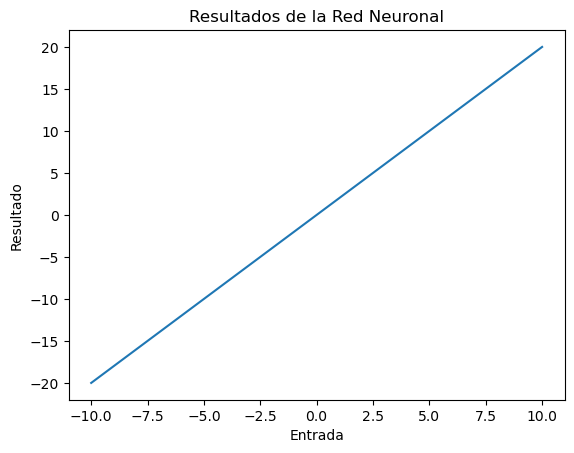

In [13]:
#f(x)=2x 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

w = [np.array([[1, 1]]),np.array([[1],[1]])]
bias = [np.array([0,0]),0]
activation_function = [[[linear_function],[linear_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []

for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    results.append(output)

# Graficar los resultados
plt.plot(x, results)
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal')
plt.show()

Segundo caso,

Hidden layer with three logistic activation function and output layer with liner function 

0.0001949085174145971


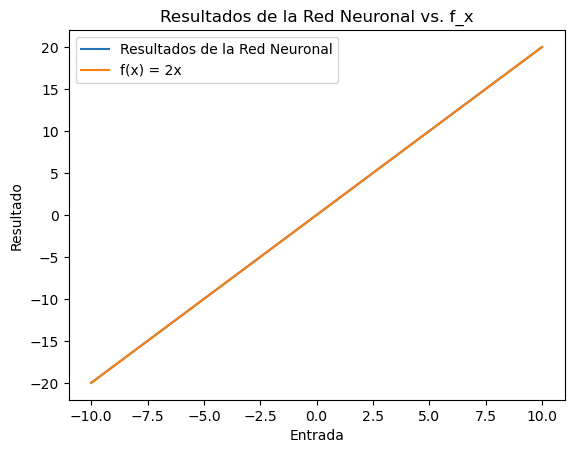

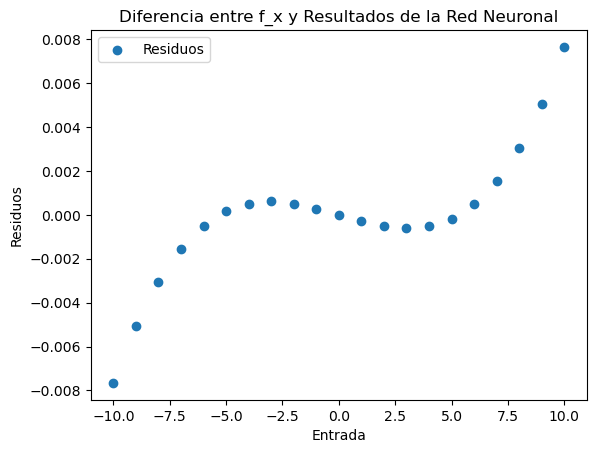

In [21]:
#f(x)=2x con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1

w = [np.array([[0.008 , 0.00012,0]]), np.array([[1000], [10],[1]])]
bias = [np.array([0,0,0]),0]
activation_function = [[[logistic_function],[logistic_function],[logistic_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)

# Graficar los resultados
f_x = 2*x_ax

# Calcular los residuos (diferencia entre f_x y resultados)
residuos = f_x - results

residuo = np.sum((f_x - results)**2)
print(residuo)

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Resultados de la Red Neuronal')
plt.plot(x_ax, f_x, label='f(x) = 2x')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Graficar la gráfica de residuos
plt.figure()  # Crear una nueva figura
plt.scatter(x_ax, residuos, label='Residuos')
plt.xlabel('Entrada')
plt.ylabel('Residuos')
plt.title('Diferencia entre f_x y Resultados de la Red Neuronal')
plt.legend()

# Mostrar las gráficas
plt.show()

**Ejercicio 4.1 b)**

In [ ]:
#f(x)=2x con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1

w = [np.array([[15, -2,0]]), np.array([[1], [1],[1]])]
bias = [np.array([0,0,0]),0]
activation_function = [[[logistic_function],[logistic_function],[logistic_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)

# Graficar los resultados
f_x = 2*x_ax**2

# Calcular los residuos (diferencia entre f_x y resultados)
residuo = 10
optimizado = []      
for w_tercero in np.arange(0, 1.001, 0.001):
    for w_dos in np.arange(0, 1.001, 0.001):
        for w_uno in np.arange(0, 1.001, 0.001):
            w = [np.array([[w_uno, w_dos,w_tercero]]), np.array([[10],[10],[10]])]
            for input_value in x:
                result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
                if np.sum((f_x - results)**2) < residuo:
                    archivos[0]=result
                    results[0]=output
                    optimizado[0]=w

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Resultados de la Red Neuronal')
#plt.plot(x_ax, f_x, label='f(x) = 2x')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Graficar la gráfica de residuos
plt.figure()  # Crear una nueva figura
plt.scatter(x_ax, residuos, label='Residuos')
plt.xlabel('Entrada')
plt.ylabel('Residuos')
plt.title('Diferencia entre f_x y Resultados de la Red Neuronal')
plt.legend()

# Mostrar las gráficas
plt.show()

[0.14950199193743385]
[-1.1423912339336473, -1.0744468052985368, -0.9960551554017734, -0.9065516656757454, -0.805574350497053, -0.6931757358900147, -0.5699234433828373, -0.43696891867738635, -0.296062980337356, -0.14950199193743352, 0.0, 0.14950199193743385, 0.296062980337356, 0.4369689186773862, 0.5699234433828375, 0.6931757358900147, 0.8055743504970533, 0.9065516656757454, 0.9960551554017734, 1.0744468052985368, 1.142391233933647]


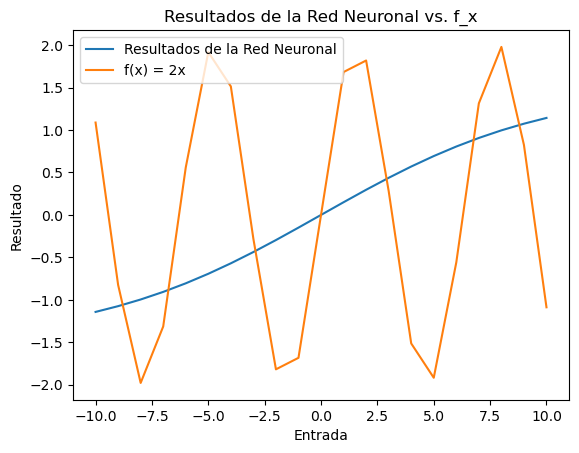

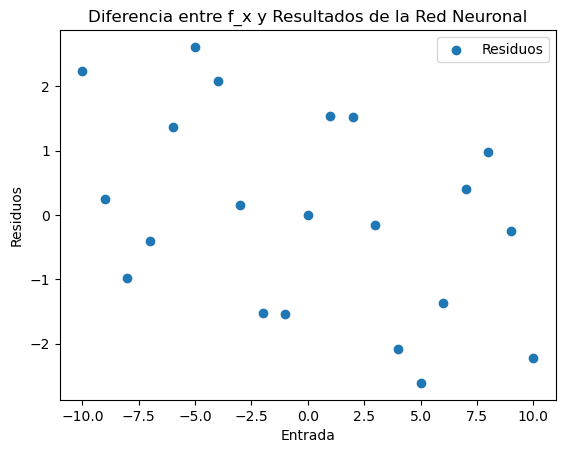

In [597]:
#f(x)=2x con tres 
x = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
x_ax = np.arange(-10, 11, 1)  # Valores de -10 a 10 con paso 1

w = [np.array([[0.2,0.2,0.2]]), np.array([[1], [1],[1]])]
bias = [np.array([0,0,0]),0]
activation_function = [[[logistic_function],[logistic_function],[logistic_function]],[[linear_function]]]



# Calcular los resultados para cada valor de entrada
results = []
archivos = []
for input_value in x:
    result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
    archivos.append(result)
    results.append(output)
print(archivos[11][2])
# Graficar los resultados
f_x = 2*np.sin(x_ax)

# Calcular los residuos (diferencia entre f_x y resultados)
print(results)
residuos = f_x - results

# Graficar los resultados y la función f_x
plt.plot(x, results, label='Resultados de la Red Neuronal')
plt.plot(x_ax, f_x, label='f(x) = 2x')
plt.xlabel('Entrada')
plt.ylabel('Resultado')
plt.title('Resultados de la Red Neuronal vs. f_x')
plt.legend()

# Graficar la gráfica de residuos
plt.figure()  # Crear una nueva figura
plt.scatter(x_ax, residuos, label='Residuos')
plt.xlabel('Entrada')
plt.ylabel('Residuos')
plt.title('Diferencia entre f_x y Resultados de la Red Neuronal')
plt.legend()

# Mostrar las gráficas
plt.show()

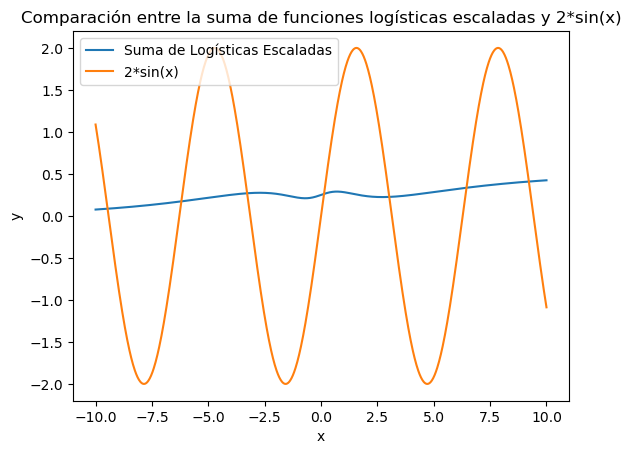

In [600]:

 import numpy as np
import matplotlib.pyplot as plt

def scaled_logistic_function(x, k, c):
    return 1 / (1 + np.exp(-k * (c * x)))

# Definir el rango de -10 a 10
x_values = np.linspace(-10, 10, 1000)

# Definir los coeficientes y parámetros para cada función logística
coefficients = [1, -1, 0.5]
parameters = [0.5, 1, 1.5]

# Constantes multiplicativas para cada función logística
constants = [0.5, 1, 1.5]

# Calcular la suma de tres funciones logísticas escaladas con diferentes constantes multiplicativas
y_values_sum_scaled = sum(coeff * scaled_logistic_function(x_values, param, c) for coeff, param, c in zip(coefficients, parameters, constants))

# Calcular la función 2*sin(x) para comparación
y_values_sine = 2 * np.sin(x_values)

# Graficar la suma de funciones logísticas escaladas y 2*sin(x)
plt.plot(x_values, y_values_sum_scaled, label='Suma de Logísticas Escaladas')
plt.plot(x_values, y_values_sine, label='2*sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación entre la suma de funciones logísticas escaladas y 2*sin(x)')
plt.legend()
plt.show()



In [16]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, b=0.5):
    return 1 / (1 + np.exp(-x)) - b

def linear_function(x, b=1):
    return b * x

def multilayer_perceptron(inputs, weights_list, biases_list, functions_list):
    input_history = [inputs]

    for i in range(len(weights_list)):
        layer_input = input_history[i]
        current_weights = weights_list[i]
        current_biases = biases_list[i]
        activation_function = functions_list[i]

        layer_input = np.dot(layer_input, current_weights) + current_biases
        valores = []

        for j in range(len(layer_input)):
            if len(activation_function[j]) > 1:
                valor = activation_function[j][0](layer_input[j], activation_function[j][1])
                valores.append(valor)
            else:
                valor = activation_function[j][0](layer_input[j])
                valores.append(valor)

        input_history.append(valores)

    return input_history, input_history[-1][0]

def calcular_residuos_cuadrados(w, x, activation_function, target_function):
    results = []

    for input_value in x:
        result, output = multilayer_perceptron(np.array([input_value]), w, bias, activation_function)
        results.append(output)

    f_x = target_function(x)
    residuos = f_x - results
    residuos_cuadrados = np.sum(residuos**2)

    return residuos_cuadrados, residuos

# Configuración de datos y parámetros
x = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bias = [np.array([0, 0, 0]), 0]
activation_function = [[[logistic_function], [logistic_function], [logistic_function]], [[linear_function]]]
initial_weights = [np.array([[15, -2, 0]]), np.array([[1], [1], [1]])]

# Hiperparámetros de la optimización
learning_rate = 0.01
epochs = 100

# Inicializar el mejor conjunto de pesos
mejor_residuo_cuadrado = float('inf')
mejor_w = None

# Bucles for para los valores iterativos del tercer peso en la primera capa
for w_tercero in np.arange(0, 1.001, 0.001):
    for w[0][0, 1] in np.arange(0, 1.001, 0.001):
        for w[0][0, 1] in np.arange(0, 1.001, 0.001):

            # Optimización iterativa de los pesos w
            for epoch in range(epochs):
                residuos_cuadrados, residuos = calcular_residuos_cuadrados(w, x, activation_function, lambda x: 2 * x**2)

                # Actualizar los pesos utilizando gradiente descendente
                gradientes = [-2 * np.dot(residuos, x), -2 * np.dot(residuos, multilayer_perceptron(x, w, bias, activation_function)[0][1][-1]), -2 * np.sum(residuos)]
                w[0] -= learning_rate * gradientes[0].reshape(w[0].shape)
                w[1] -= learning_rate * gradientes[1].reshape(w[1].shape)
                w[0][0, 1] -= learning_rate * gradientes[2]

            # Calcular los resultados con los pesos optimizados
            results_optimizados = [multilayer_perceptron(np.array([input_value]), w, bias, activation_function)[1] for input_value in x]

            # Calcular los residuos cuadrados
            residuo_cuadrado_actual, _ = calcular_residuos_cuadrados(w, x, activation_function, lambda x: 2 * x**2)

            # Comparar con el mejor resultado hasta ahora
            if residuo_cuadrado_actual < mejor_residuo_cuadrado:
                mejor_residuo_cuadrado = residuo_cuadrado_actual
                mejor_w = np.copy(w)

# Imprimir el mejor resultado
print(f"Mejor residuo cuadrado: {mejor_residuo_cuadrado}")
print(f"Mejor conjunto de pesos:")
print("Capa 1:", mejor_w[0])
print("Capa 2:", mejor_w[1])

ValueError: operands could not be broadcast together with shapes (2,) (3,) 